In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lbc.scenario import Scenario
from lbc.demand_response import DemandResponseProgram
from lbc.policies import RuleBasedControlPolicy

%matplotlib inline
%load_ext autoreload

In [2]:
def hr_index(index, hr):
    return np.where(np.array([x.hour for x in index]) == hr)[0][0]

# TOU

In [3]:
dr = DemandResponseProgram("TOU")
s = Scenario(dr_program=dr)

In [4]:
dr.default_config["TOU"]

{'dr_start_time': '12:00:00',
 'dr_end_time': '18:00:00',
 'program_type': 'TOU',
 'program_specific': {'tou_off_peak': 1.0, 'tou_peak': 10.0}}

In [7]:
%autoreload 2
from lbc.policies import RuleBasedControlPolicy

[(0, 27), (83, 24), (131, 21), (143, 24), (215, 24), (215, 27)]


<AxesSubplot:>

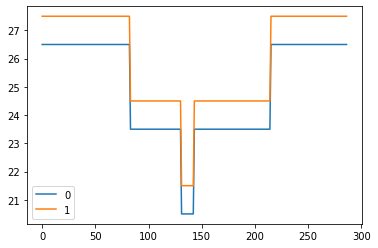

In [8]:
# Comfort start/stop applies to all DR programs
comfort_start = hr_index(s.time_index, hr=7)
comfort_stop = hr_index(s.time_index, hr=18)

# DR start and stop indexes
dr_start = hr_index(s.time_index, hr=12)
dr_stop = hr_index(s.time_index, hr=18)

# Precooling happens 1 hr before DR start
precooling_start = dr_start - 12  # 5 min/step

setpoints = [
    (0, 27),
    (comfort_start, 24),
    (precooling_start, 21), 
    (dr_start, 24),
    (dr_stop, 24),
    (comfort_stop, 27)
]

print(setpoints)

policy = RuleBasedControlPolicy(
    setpoints=setpoints, num_steps=s.num_episode_steps,
    cooling_p_flow=1., cooling_p_discharge_temp=.8)

pd.DataFrame(policy.comfort_band).plot()

# PC

In [9]:
dr = DemandResponseProgram("PC")
s = Scenario(dr_program=dr)

dr.default_config["PC"]

{'dr_start_time': '13:00:00',
 'dr_end_time': '17:00:00',
 'program_type': 'PC',
 'program_specific': {'p_limit_dr': 10.0,
  'p_limit_nondr': 25.0,
  'base_price': 1.0,
  'pc_penalty': 10.0}}

[(0, 27), (83, 24), (143, 21), (155, 24), (203, 24), (215, 27)]


<AxesSubplot:>

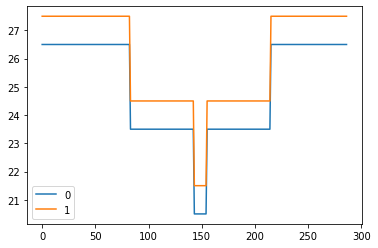

In [10]:
dr_start = hr_index(s.time_index, hr=13)
dr_stop = hr_index(s.time_index, hr=17)

precooling_start = dr_start - 12  # 5 min/step
precooling_stop = dr_start

setpoints = [
    (0, 27),
    (comfort_start, 24),
    (precooling_start, 21), 
    (dr_start, 24),
    (dr_stop, 24),
    (comfort_stop, 27)
]

print(setpoints)

policy = RuleBasedControlPolicy(
    setpoints=setpoints, num_steps=s.num_episode_steps,
    cooling_p_flow=1., cooling_p_discharge_temp=.8)

pd.DataFrame(policy.comfort_band).plot()

# RTP

In [11]:
dr = DemandResponseProgram("RTP")
s = Scenario(dr_program=dr)

dr.default_config["RTP"]

{'program_type': 'RTP', 'program_specific': {}}

[(0, 27), (83, 24), (131, 21), (143, 24), (215, 27)]


<AxesSubplot:>

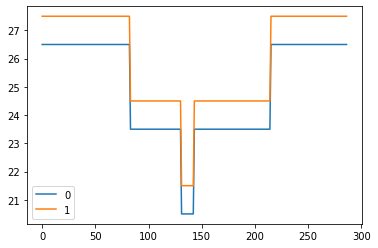

In [12]:
dr_start = hr_index(s.time_index, hr=12)

precooling_start = dr_start - 12  # 5 min/step
precooling_stop = dr_start

setpoints = [
    (0, 27),
    (comfort_start, 24),
    (precooling_start, 21), 
    (dr_start, 24),
    (comfort_stop, 27)
]


print(setpoints)

policy = RuleBasedControlPolicy(
    setpoints=setpoints, num_steps=s.num_episode_steps,
    cooling_p_flow=1., cooling_p_discharge_temp=.8)

pd.DataFrame(policy.comfort_band).plot()